# **Digital Literacy Project (Econometrics)**
## Analyzing Impact of Countries' Food Security and Health Spending on Average Life Expectancy

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from matplotlib.ticker import StrMethodFormatter

108


,country,life_expec,health_expenditure,population,rank,Country,Overall Score,Affordability,Availability,Quality & safety
0,Burundi,62.4,61.80,11874838,112,Burundi,34.3,36.6,32.2,34.5
1,Madagascar,65.9,65.23,27533134,108,Madagascar,37.9,35.7,45.7,22.1
2,Chad,53.3,69.40,16126868,109,Chad,36.9,40.3,34.9,33.5
3,Niger,62.9,72.48,23443400,89,Niger,49.6,50.2,53.6,37.4
4,Ethiopia,65.8,75.11,114120592,91,Ethiopia,49.2,49.7,52.6,39.0


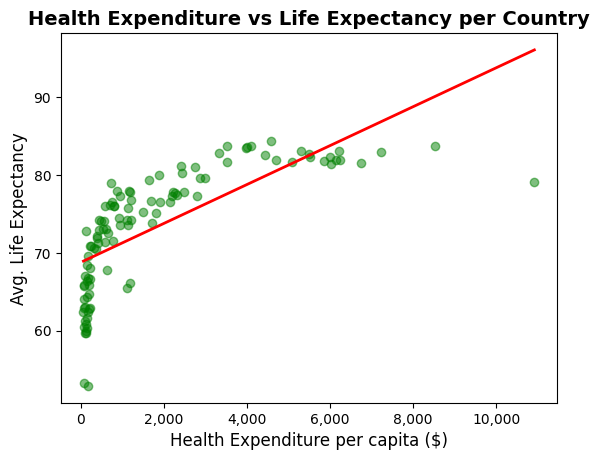

In [ ]:
health = pd.read_csv("health_expenditures.csv")
gfsi = pd.read_csv("GFSI2019.csv")
gfsi["country"] = gfsi["Country"]
data = health.merge(gfsi, on = "country", how = "inner")
print(len(data))
display(data.head())

coefficients = np.polyfit(data['health_expenditure'], data['life_expec'], 1)
poly_function = np.poly1d(coefficients)

plt.scatter(data.health_expenditure, data.life_expec, c = "g", alpha = 0.5)
plt.plot(data['health_expenditure'], poly_function(data['health_expenditure']), color='red', linewidth=2)
plt.title("Health Expenditure vs Life Expectancy per Country", fontsize = 14, fontweight = "bold")
plt.xlabel("Health Expenditure per capita ($)", fontsize = 12)
plt.ylabel("Avg. Life Expectancy", fontsize = 12)

plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))


plt.show()

In [ ]:
x = np.array(data.health_expenditure).reshape(-1,1)
y = data.life_expec
lm = LinearRegression()
lm.fit(x,y)
y_pred = lm.predict(x)

r_squared = lm.score(x, y)

print(r_squared)

0.5216049336830348


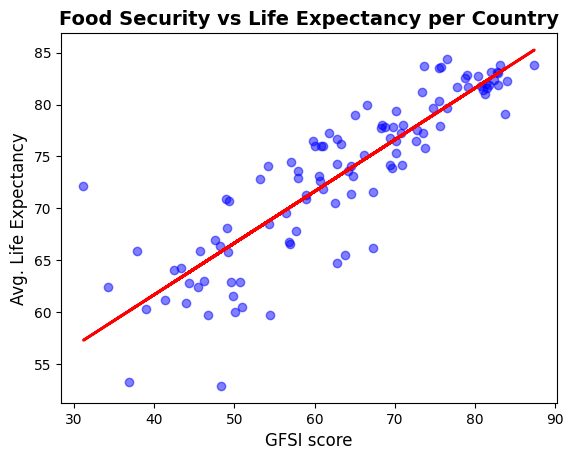

In [ ]:
coefficients = np.polyfit(data['Overall Score'], data['life_expec'], 1)
poly_function = np.poly1d(coefficients)


plt.scatter(data["Overall Score"], data.life_expec, c = "blue", alpha = 0.5)
plt.plot(data["Overall Score"], poly_function(data["Overall Score"]), color = "red", linewidth = 2)
plt.title("Food Security vs Life Expectancy per Country", fontweight = "bold", fontsize = 14)
plt.xlabel("GFSI score", fontsize = 12)
plt.ylabel("Avg. Life Expectancy", fontsize = 12)
plt.show()

In [ ]:
x = np.array(data["Overall Score"]).reshape(-1,1)
y = data.life_expec
lm = LinearRegression()
lm.fit(x,y)
y_pred = lm.predict(x)

r_squared = lm.score(x, y)

print(r_squared)

0.7586010755410659


In [ ]:

from sklearn.metrics import r2_score


x = data[['health_expenditure', 'Overall Score']]
y = data['life_expec']

scaler = StandardScaler()

# Reshape x to have two columns
x = scaler.fit_transform(x)

# Reshape y to a 2D array
y = np.array(y).reshape(-1, 1)
y = scaler.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

lm = LinearRegression()
lm.fit(x_train, y_train)
y_pred = lm.predict(x_test)

# Calculate R-squared value using the correct method
r_squared = lm.score(x_test, y_test)
print("R-squared:", r_squared)


R-squared: 0.8721957357194793


In [ ]:
x_with_constant = sm.add_constant(x_train)

# Fit the linear regression model using statsmodels
model = sm.OLS(y_train, x_with_constant).fit()

# Print the summary to get information about the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     112.7
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           2.22e-24
Time:                        16:54:05   Log-Likelihood:                -65.463
No. Observations:                  86   AIC:                             136.9
Df Residuals:                      83   BIC:                             144.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0030      0.057      0.053      0.9